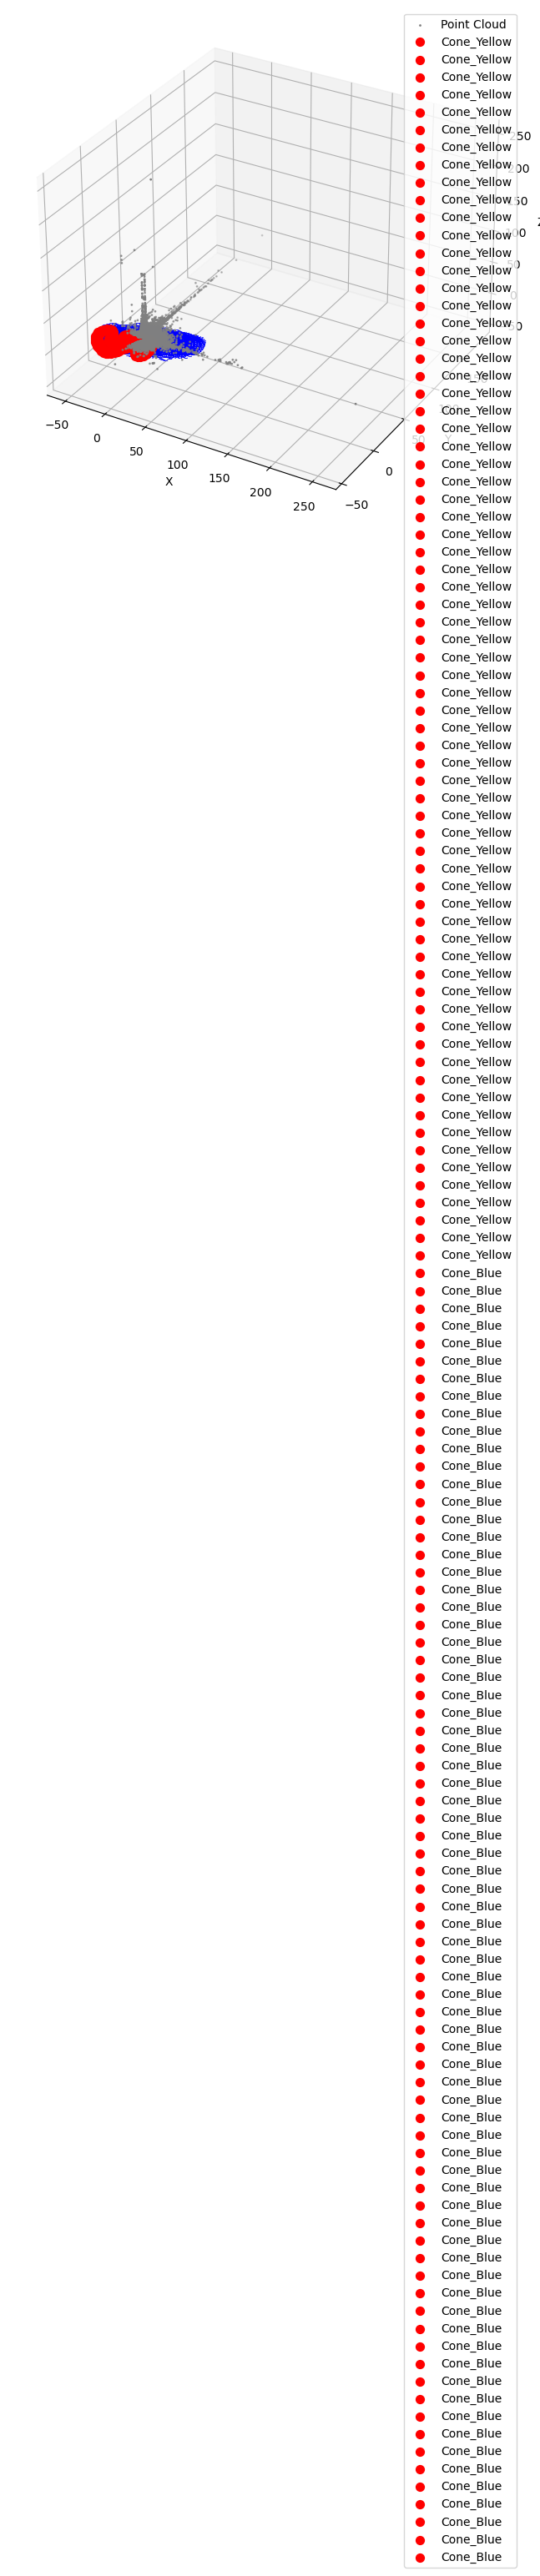

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


AttributeError: 'open3d.cpu.pybind.visualization.ViewControl' object has no attribute 'look_at'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

# Function to load a .bin point cloud file
def load_pointcloud(file_path):
    """
    Load a binary point cloud file and return an N x 3 numpy array of points (x, y, z).
    """
    pointcloud = np.fromfile(file_path, dtype=np.float32).reshape(-1, 3)
    return pointcloud

# Function to load labels
def load_labels(file_path):
    """
    Load labels from a text file. Each line contains:
    x, y, z (coordinates) and a label.
    """
    labels = []
    with open(file_path, 'r') as file:
        for line in file.readlines():
            parts = line.strip().split()
            x, y, z = map(float, parts[:3])  # x, y, z coordinates
            label = parts[-1]  # Last column is the label
            labels.append((x, y, z, label))
    return labels

# Visualization with Matplotlib
def visualize_pointcloud_matplotlib(pointcloud, labels=None):
    """
    Visualize the point cloud and optionally labeled points using Matplotlib in 3D.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot point cloud
    ax.scatter(pointcloud[:, 0], pointcloud[:, 1], pointcloud[:, 2], s=1, c='gray', label="Point Cloud")

    # Add labeled points
    if labels:
        for x, y, z, label in labels:
            ax.scatter(x, y, z, s=50, c='red', label=label)
            ax.text(x, y, z, label, color='blue', fontsize=8)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

def visualize_with_open3d(pointcloud, labels=None):
    """
    Visualize the point cloud and optionally labeled points using Open3D.
    Zoom into the middle of the point cloud for better inspection.
    """
    # Create a point cloud object
    pc = o3d.geometry.PointCloud()
    pc.points = o3d.utility.Vector3dVector(pointcloud)

    geometries = [pc]

    # Add labeled points as small spheres
    if labels:
        for x, y, z, label in labels:
            sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.1)  # Create a sphere for the labeled point
            sphere.translate((x, y, z))  # Position the sphere at the label's location
            sphere.paint_uniform_color([1, 0, 0])  # Color the sphere red
            geometries.append(sphere)

    # Open the visualizer
    vis = o3d.visualization.Visualizer()
    vis.create_window()

    for geometry in geometries:
        vis.add_geometry(geometry)

    # Get the point cloud center and set camera view
    center = pc.get_center()  # Calculate the center of the point cloud
    view_control = vis.get_view_control()
    view_control.set_zoom(0.5)  # Adjust zoom level (lower values zoom in)
    view_control.look_at(center)  # Focus the camera on the center of the point cloud

    # Run the visualizer
    vis.run()
    vis.destroy_window()


# Example Usage
if __name__ == "__main__":
    pointcloud_file = "points/0000001.bin"  # Path to point cloud file
    label_file = "labels/0000001.txt"      # Path to label file

    # Load point cloud and labels
    pointcloud = load_pointcloud(pointcloud_file)
    labels = load_labels(label_file)

    # Visualize using Matplotlib
    visualize_pointcloud_matplotlib(pointcloud, labels=labels)

    # Visualize using Open3D
    visualize_with_open3d(pointcloud, labels=labels)
